In [357]:
!nvidia-smi

Sun Jun 13 14:32:07 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.27       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   44C    P0    37W / 250W |    907MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## 套件

In [358]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv

# pytorch
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader

# random seed
myseed = 615

# accelerate
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False
np.random.seed(myseed)
torch.manual_seed(myseed)
if torch.cuda.is_available():
    torch.cuda.manual_seed_all(myseed)

from tqdm.notebook import tqdm

In [359]:
def get_device():
    return 'cuda' if torch.cuda.is_available() else 'cpu'

## 讀檔

In [362]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
"""
def ConcatData(Input, path):
    for year in range(2000, 2020+1, 1):
        for month in range(1, 12+1, 1):
            if month < 10:
                tmp = pd.read_csv(path + f"{year}-0{month}.csv", skiprows=[0, 1])
            else:
                tmp = pd.read_csv(path + f"{year}-{month}.csv", skiprows=[0, 1])
            Input = pd.concat([Input, tmp], ignore_index=True)
    return Input

# path
root = "/content/drive/MyDrive/統計專題/data/"
path_Taipei = root + "Taipei/"
path_Taichung = root + "Taichung/"
path_Kaohsiung = root + "Kaohsiung/"
path_Yilan = root + "Yilan/"

# Init
data_Taipei = data_Taichung = data_Kaohsiung = data_Yilan = pd.DataFrame()

# Concatenate Data
data_Taipei = ConcatData(data_Taipei, path_Taipei)
data_Taichung = ConcatData(data_Taichung, path_Taichung)
data_Kaohsiung = ConcatData(data_Kaohsiung, path_Kaohsiung)
data_Yilan = ConcatData(data_Yilan, path_Yilan)

# output file
data_Taipei.to_csv("/content/drive/MyDrive/統計專題/data/ConcatData/data_Taipei.csv", index=False)
data_Taichung.to_csv("/content/drive/MyDrive/統計專題/data/ConcatData/data_Taichung.csv", index=False)
data_Kaohsiung.to_csv("/content/drive/MyDrive/統計專題/data/ConcatData/data_Kaohsiung.csv", index=False)
data_Yilan.to_csv("/content/drive/MyDrive/統計專題/data/ConcatData/data_Yilan.csv", index=False)
"""

'\ndef ConcatData(Input, path):\n    for year in range(2000, 2020+1, 1):\n        for month in range(1, 12+1, 1):\n            if month < 10:\n                tmp = pd.read_csv(path + f"{year}-0{month}.csv", skiprows=[0, 1])\n            else:\n                tmp = pd.read_csv(path + f"{year}-{month}.csv", skiprows=[0, 1])\n            Input = pd.concat([Input, tmp], ignore_index=True)\n    return Input\n\n# path\nroot = "/content/drive/MyDrive/統計專題/data/"\npath_Taipei = root + "Taipei/"\npath_Taichung = root + "Taichung/"\npath_Kaohsiung = root + "Kaohsiung/"\npath_Yilan = root + "Yilan/"\n\n# Init\ndata_Taipei = data_Taichung = data_Kaohsiung = data_Yilan = pd.DataFrame()\n\n# Concatenate Data\ndata_Taipei = ConcatData(data_Taipei, path_Taipei)\ndata_Taichung = ConcatData(data_Taichung, path_Taichung)\ndata_Kaohsiung = ConcatData(data_Kaohsiung, path_Kaohsiung)\ndata_Yilan = ConcatData(data_Yilan, path_Yilan)\n\n# output file\ndata_Taipei.to_csv("/content/drive/MyDrive/統計專題/data/Con

In [460]:
# 讀Concat檔
data_Taipei = pd.read_csv("/content/drive/MyDrive/統計專題/data/ConcatData/data_Taipei.csv")
data_Taichung = pd.read_csv("/content/drive/MyDrive/統計專題/data/ConcatData/data_Taichung.csv")
data_Kaohsiung = pd.read_csv("/content/drive/MyDrive/統計專題/data/ConcatData/data_Kaohsiung.csv")
data_Yilan = pd.read_csv("/content/drive/MyDrive/統計專題/data/ConcatData/data_Yilan.csv")

In [529]:
# data_Taipei
# data_Taichung
# data_Kaohsiung
data_Yilan

,ObsTime,StnPres,SeaPres,StnPresMax,StnPresMaxTime,StnPresMin,StnPresMinTime,Temperature,T Max,T Max Time,T Min,T Min Time,Td dew point,RH,RHMin,RHMinTime,WS,WD,WSGust,WDGust,WGustTime,Precp,PrecpHour,PrecpMax10,PrecpMax10Time,PrecpMax60,PrecpMax60Time,SunShine,SunShineRate,GloblRad,VisbMean,EvapA,UVI Max,UVI Max Time,Cloud Amount
0,1,1014.9,1015.8,1016.6,2000-01-01 08:45,1012.3,2000-01-01 15:18,20.7,25.5,2000-01-01 12:41,16.2,2000-01-01 06:31,13.9,66,49,2000-01-01 18:46,2.3,320,9.3,360,2000-01-01 14:36,0.0,0.0,0.0,...,0.0,...,7.4,69.9,8.64,12.4,2.9,4,2000-01-01 12:00,5.1
1,2,1017.1,1018.0,1019.0,2000-01-02 21:36,1014.7,2000-01-02 14:15,19.1,24.4,2000-01-02 13:21,13.9,2000-01-02 06:58,11.0,60,40,2000-01-02 01:06,2.1,240,10.6,90,2000-01-02 15:35,0.0,0.0,0.0,...,0.0,...,9.7,91.6,8.34,11.3,2.1,3,2000-01-02 13:00,3.3
2,3,1017.3,1018.3,1019.1,2000-01-03 08:59,1015.7,2000-01-03 15:14,18.8,22.5,2000-01-03 11:28,16.3,2000-01-03 23:11,13.8,74,59,2000-01-03 11:49,1.3,110,5.8,90,2000-01-03 14:17,0.0,0.0,0.0,...,0.0,...,2.4,22.6,4.23,7.5,1.7,2,2000-01-03 12:00,9.0
3,4,1015.4,1016.3,1017.4,2000-01-04 09:08,1013.4,2000-01-04 14:32,19.5,24.8,2000-01-04 12:44,15.2,2000-01-04 04:23,15.7,79,63,2000-01-04 12:48,1.6,270,8.5,170,2000-01-04 14:29,0.0,0.0,0.0,...,0.0,...,7.1,67.0,7.91,9.0,2.0,4,2000-01-04 13:00,5.0
4,5,1013.4,1014.3,1014.9,2000-01-05 00:01,1011.7,2000-01-05 13:24,20.4,26.1,2000-01-05 12:31,16.6,2000-01-05 06:04,16.0,77,51,2000-01-05 11:23,1.3,290,6.0,90,2000-01-05 13:47,0.0,0.0,0.0,...,0.0,...,8.5,80.1,9.38,8.9,1.5,4,2000-01-05 13:00,4.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7666,27,1015.6,1016.5,1017.6,2020-12-27 22:09,1013.8,2020-12-27 15:10,19.6,25.7,2020-12-27 11:35,14.9,2020-12-27 06:56,15.9,80,51,2020-12-27 11:34,1.4,300,4.7,110,2020-12-27 11:45,T,0.5,T,2020-12-27 20:10,T,2020-12-27 20:10,4.1,38.8,8.73,17.0,-0.3,5,2020-12-27 12:00,5.8
7667,28,1016.3,1017.3,1018.8,2020-12-28 08:29,1013.9,2020-12-28 23:57,18.7,19.7,2020-12-28 15:57,18.0,2020-12-28 07:43,16.2,85,75,2020-12-28 03:46,1.6,280,6.6,210,2020-12-28 07:23,2.0,4.7,0.5,2020-12-28 05:48,1.5,2020-12-28 06:56,0.0,0.0,0.00,13.3,-1.6,1,2020-12-28 11:00,10.0
7668,29,1012.8,1013.7,1014.8,2020-12-29 23:59,1010.5,2020-12-29 14:48,21.0,26.6,2020-12-29 12:42,17.6,2020-12-29 06:45,17.6,82,62,2020-12-29 12:39,1.4,120,5.7,130,2020-12-29 12:49,0.0,0.0,0.0,...,0.0,...,4.8,45.4,11.02,16.5,-1.0,6,2020-12-29 12:00,5.7
7669,30,1024.3,1025.3,1028.8,2020-12-30 23:50,1014.7,2020-12-30 00:01,13.4,19.8,2020-12-30 00:49,10.4,2020-12-30 23:51,7.2,66,56,2020-12-30 23:32,4.0,40,14.5,90,2020-12-30 01:27,0.5,0.1,0.5,2020-12-30 01:22,0.5,2020-12-30 00:32,0.0,0.0,1.34,10.3,1.3,1,2020-12-30 13:00,9.7


## Preprocessing

#### 相關係數

In [462]:
def is_number(str):
    try:
        # 因為使用float有一個例外是'NaN'
        if str=='NaN':
              return False
        float(str)
        return True
    except ValueError:
        return False


def is_number2(str):
    try:
      # 因為使用float有一個例外是'NaN'
        if str=='NaN':
            return False
        int(str)
        return True
    except ValueError:
        return False

#TODO toType
def toType(df):
    afterDf = pd.DataFrame()

    lenA = len(df)
    inter = ['ObsTime', 'RH', 'RHMin', 'WD', 'WDGust', 'UVI Max']
    fl = ['StnPres', 'SeaPres', 'StnPresMax', 'StnPresMin', 'Temperature', 'T Max', 'T Min', 'Td dew point', 'WS', 'WSGust', 'Precp', 'PrecpHour', 'PrecpMax10', 'PrecpMax60', 'SunShine', 'SunShineRate', 'GloblRad', 'VisbMean', 'EvapA', 'Cloud Amount']
    time = ['StnPresMaxTime', 'StnPresMinTime', 'T Max Time', 'T Min Time', 'RHMinTime', 'WGustTime', 'PrecpMax10Time', 'PrecpMax60Time', 'UVI Max Time']
    for i in inter:
        afterDf[i] = df[i]
        for j in range(lenA): 
            if is_number2(df[i][j]):
                afterDf[i][j] = int(df[i][j])
            else:
                afterDf[i][j] = 0

    for i in fl:
        afterDf[i] = df[i]
        for j in range(lenA):
            if is_number(df[i][j]):
                afterDf[i][j] = float(df[i][j])
            else:
                afterDf[i][j] = 0
    for i in fl:
        afterDf[i] = pd.to_numeric(afterDf[i], errors='coerce')
    for i in inter:
        afterDf[i] = pd.to_numeric(afterDf[i], errors='coerce')

    return afterDf

def toType2(df):
    afterDf = pd.DataFrame()

    lenA = len(df)
    inter = ['ObsTime', 'RH', 'RHMin', 'WD', 'WDGust', 'UVI Max']
    fl = ['StnPres', 'SeaPres', 'StnPresMax', 'StnPresMin', 'Temperature', 'T Max', 'T Min', 'Td dew point', 'WS', 'WSGust', 'Precp', 'PrecpHour', 'PrecpMax10', 'PrecpMax60', 'SunShine', 'SunShineRate', 'GloblRad', 'VisbMean', 'EvapA', 'Cloud Amount']
    time = ['StnPresMaxTime', 'StnPresMinTime', 'T Max Time', 'T Min Time', 'RHMinTime', 'WGustTime', 'PrecpMax10Time', 'PrecpMax60Time', 'UVI Max Time']
    
    for i in inter:
        afterDf[i] = df[i]
        for j in range(lenA): 
            if is_number2(df[i][j]):
                afterDf[i][j] = int(df[i][j])
            else:
                afterDf[i][j] = 0

    for i in fl:
        afterDf[i] = df[i]
        for j in range(lenA):
            if is_number(df[i][j]):
                afterDf[i][j] = float(df[i][j])
            else:
                afterDf[i][j] = 0
    for i in fl:
        afterDf[i] = pd.to_numeric(afterDf[i], errors='coerce')
    for i in inter:
        afterDf[i] = pd.to_numeric(afterDf[i], errors='coerce')

    return afterDf


In [532]:
print(len(data_Taipei))
print(len(data_Kaohsiung))
print(len(data_Yilan))

7671
7671
7671


In [533]:
# preprocess the int, float data
#TODO data_Taipei fixed
# test = toType(data_Taipei)
# test = toType(data_Taichung)
# test = toType(data_Kaohsiung)
test = toType(data_Yilan)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:44: SettingWithCopyWarning: 
A value is trying to b

In [536]:
mask = test["Precp"] > 0
# test["PrecpHour"] > 0
outOfPrecp = test[mask]


In [537]:
outOfPrecp

,ObsTime,RH,RHMin,WD,WDGust,UVI Max,StnPres,SeaPres,StnPresMax,StnPresMin,Temperature,T Max,T Min,Td dew point,WS,WSGust,Precp,PrecpHour,PrecpMax10,PrecpMax60,SunShine,SunShineRate,GloblRad,VisbMean,EvapA,Cloud Amount
5,6,81,63,100,80,4,1013.8,1014.7,1015.4,1012.0,20.3,24.9,16.1,16.9,2.1,9.4,8.5,5.2,4.0,5.8,6.5,61.2,8.04,9.5,2.2,5.4
6,7,94,81,280,80,1,1017.1,1018.1,1019.4,1015.2,17.5,19.9,16.5,16.5,2.2,11.9,51.1,15.5,2.5,7.5,0.0,0.0,0.00,7.0,0.1,9.8
7,8,91,72,290,110,4,1014.2,1015.1,1016.9,1011.8,20.1,25.0,17.1,18.4,1.4,5.2,1.5,3.0,0.4,0.7,6.9,64.9,9.83,11.3,3.9,5.0
9,10,96,86,280,90,1,1017.1,1018.0,1018.9,1015.1,18.9,20.3,18.0,18.2,1.5,8.8,12.2,19.2,1.1,3.2,0.0,0.0,0.00,7.1,0.3,10.0
10,11,93,75,290,140,4,1014.6,1015.6,1017.8,1012.1,19.9,24.7,17.8,18.6,1.0,5.8,0.7,8.3,0.2,0.4,4.0,37.5,5.66,8.3,0.7,6.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7662,23,93,86,320,310,1,1015.6,1016.5,1018.7,1012.8,19.3,20.9,18.1,18.1,1.3,5.4,7.0,12.7,1.0,2.0,0.0,0.0,2.71,7.7,-0.1,9.8
7663,24,80,69,30,20,4,1014.8,1015.7,1018.4,1011.6,19.8,23.7,17.9,16.1,2.6,9.1,0.5,0.8,0.5,0.5,0.9,8.5,6.56,13.0,-0.7,9.7
7664,25,90,78,260,240,1,1019.8,1020.8,1021.4,1017.7,16.3,18.0,15.4,14.7,1.3,4.5,7.0,17.1,0.5,1.5,0.0,0.0,0.15,5.5,-0.3,10.0
7667,28,85,75,280,210,1,1016.3,1017.3,1018.8,1013.9,18.7,19.7,18.0,16.2,1.6,6.6,2.0,4.7,0.5,1.5,0.0,0.0,0.00,13.3,-1.6,10.0


In [538]:
outOfPrecp.corr()

,ObsTime,RH,RHMin,WD,WDGust,UVI Max,StnPres,SeaPres,StnPresMax,StnPresMin,Temperature,T Max,T Min,Td dew point,WS,WSGust,Precp,PrecpHour,PrecpMax10,PrecpMax60,SunShine,SunShineRate,GloblRad,VisbMean,EvapA,Cloud Amount
ObsTime,1.000000,0.007256,0.001974,0.013388,-0.004490,-0.004351,0.016726,0.016598,0.018255,0.012973,-0.002054,-0.003637,-0.000303,0.000611,-0.005496,0.002945,-0.022898,0.000036,-0.007793,-0.013957,-0.018620,-0.019876,-0.006199,-0.013766,0.000758,0.032454
RH,0.007256,1.000000,0.849869,-0.017697,-0.046675,-0.246895,0.046181,0.046273,0.034159,0.062703,-0.097332,-0.184307,0.003534,0.168470,-0.191588,-0.173474,0.349977,0.585018,0.180275,0.220557,-0.370806,-0.377392,-0.344498,-0.420344,0.104562,0.368033
RHMin,0.001974,0.849869,1.000000,-0.036988,-0.057667,-0.375423,0.146568,0.146777,0.133029,0.157301,-0.192332,-0.318148,-0.072623,0.038054,-0.145539,-0.178962,0.330571,0.635185,0.119223,0.161969,-0.478422,-0.487372,-0.458062,-0.515947,0.139395,0.477424
WD,0.013388,-0.017697,-0.036988,1.000000,0.364517,-0.162915,0.160605,0.161089,0.149460,0.167142,-0.213013,-0.216857,-0.188258,-0.217875,-0.253521,-0.214003,-0.089868,0.091885,-0.139186,-0.115068,-0.169613,-0.170852,-0.197208,-0.061947,0.102775,0.135486
WDGust,-0.004490,-0.046675,-0.057667,0.364517,1.000000,-0.102013,0.047906,0.048645,0.058071,0.034817,-0.149999,-0.150294,-0.144012,-0.162704,-0.085694,-0.050651,-0.048228,0.065216,-0.045300,-0.036155,-0.098581,-0.099277,-0.117760,-0.008605,0.061072,0.096170
UVI Max,-0.004351,-0.246895,-0.375423,-0.162915,-0.102013,1.000000,-0.550734,-0.551603,-0.581021,-0.492973,0.709772,0.779458,0.631914,0.635798,0.090571,0.110775,-0.101718,-0.521289,0.179945,0.089494,0.747090,0.721908,0.870642,0.520550,-0.322073,-0.629535
StnPres,0.016726,0.046181,0.146568,0.160605,0.047906,-0.550734,1.000000,0.999989,0.985708,0.979545,-0.827971,-0.797186,-0.814333,-0.807467,-0.283515,-0.362996,-0.207544,0.248547,-0.347514,-0.301302,-0.355412,-0.323951,-0.502785,-0.252432,0.260684,0.305956
SeaPres,0.016598,0.046273,0.146777,0.161089,0.048645,-0.551603,0.999989,1.000000,0.985897,0.979318,-0.829450,-0.798667,-0.815759,-0.808914,-0.283059,-0.362435,-0.207206,0.249547,-0.347626,-0.301332,-0.356242,-0.324834,-0.503748,-0.253004,0.261029,0.306820
StnPresMax,0.018255,0.034159,0.133029,0.149460,0.058071,-0.581021,0.985708,0.985897,1.000000,0.939634,-0.853309,-0.816019,-0.848150,-0.835893,-0.212658,-0.279698,-0.175854,0.271682,-0.335208,-0.281869,-0.376857,-0.343581,-0.531286,-0.270963,0.274069,0.323475
StnPresMin,0.012973,0.062703,0.157301,0.167142,0.034817,-0.492973,0.979545,0.979318,0.939634,1.000000,-0.770908,-0.745964,-0.751928,-0.746417,-0.363715,-0.462714,-0.247793,0.210686,-0.354304,-0.320216,-0.312249,-0.283400,-0.446948,-0.224639,0.232141,0.269455


In [539]:
test

,ObsTime,RH,RHMin,WD,WDGust,UVI Max,StnPres,SeaPres,StnPresMax,StnPresMin,Temperature,T Max,T Min,Td dew point,WS,WSGust,Precp,PrecpHour,PrecpMax10,PrecpMax60,SunShine,SunShineRate,GloblRad,VisbMean,EvapA,Cloud Amount
0,1,66,49,320,360,4,1014.9,1015.8,1016.6,1012.3,20.7,25.5,16.2,13.9,2.3,9.3,0.0,0.0,0.0,0.0,7.4,69.9,8.64,12.4,2.9,5.1
1,2,60,40,240,90,3,1017.1,1018.0,1019.0,1014.7,19.1,24.4,13.9,11.0,2.1,10.6,0.0,0.0,0.0,0.0,9.7,91.6,8.34,11.3,2.1,3.3
2,3,74,59,110,90,2,1017.3,1018.3,1019.1,1015.7,18.8,22.5,16.3,13.8,1.3,5.8,0.0,0.0,0.0,0.0,2.4,22.6,4.23,7.5,1.7,9.0
3,4,79,63,270,170,4,1015.4,1016.3,1017.4,1013.4,19.5,24.8,15.2,15.7,1.6,8.5,0.0,0.0,0.0,0.0,7.1,67.0,7.91,9.0,2.0,5.0
4,5,77,51,290,90,4,1013.4,1014.3,1014.9,1011.7,20.4,26.1,16.6,16.0,1.3,6.0,0.0,0.0,0.0,0.0,8.5,80.1,9.38,8.9,1.5,4.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7666,27,80,51,300,110,5,1015.6,1016.5,1017.6,1013.8,19.6,25.7,14.9,15.9,1.4,4.7,0.0,0.5,0.0,0.0,4.1,38.8,8.73,17.0,-0.3,5.8
7667,28,85,75,280,210,1,1016.3,1017.3,1018.8,1013.9,18.7,19.7,18.0,16.2,1.6,6.6,2.0,4.7,0.5,1.5,0.0,0.0,0.00,13.3,-1.6,10.0
7668,29,82,62,120,130,6,1012.8,1013.7,1014.8,1010.5,21.0,26.6,17.6,17.6,1.4,5.7,0.0,0.0,0.0,0.0,4.8,45.4,11.02,16.5,-1.0,5.7
7669,30,66,56,40,90,1,1024.3,1025.3,1028.8,1014.7,13.4,19.8,10.4,7.2,4.0,14.5,0.5,0.1,0.5,0.5,0.0,0.0,1.34,10.3,1.3,9.7


In [540]:
# corr map
test.corr()

,ObsTime,RH,RHMin,WD,WDGust,UVI Max,StnPres,SeaPres,StnPresMax,StnPresMin,Temperature,T Max,T Min,Td dew point,WS,WSGust,Precp,PrecpHour,PrecpMax10,PrecpMax60,SunShine,SunShineRate,GloblRad,VisbMean,EvapA,Cloud Amount
ObsTime,1.000000,0.003158,-0.005471,0.008177,-0.005938,0.009264,0.013734,0.013617,0.012730,0.011860,0.005872,0.003276,0.005235,0.007174,0.000357,0.001180,-0.016362,-0.002204,-0.008165,-0.011070,0.004775,0.003410,0.006475,0.008573,0.011204,-0.002892
RH,0.003158,1.000000,0.883655,-0.063768,0.019314,-0.255248,-0.056501,-0.056401,-0.050459,-0.055696,-0.028868,-0.124010,0.104420,0.280184,-0.225179,-0.140032,0.392272,0.634029,0.334538,0.337204,-0.441953,-0.456874,-0.396095,-0.398810,-0.329154,0.456726
RHMin,-0.005471,0.883655,1.000000,-0.066973,0.014856,-0.337766,0.018386,0.018601,0.020069,0.019282,-0.097991,-0.230413,0.058011,0.181019,-0.179216,-0.140831,0.384212,0.656638,0.288595,0.295998,-0.520616,-0.541568,-0.464765,-0.485944,-0.298752,0.540010
WD,0.008177,-0.063768,-0.066973,1.000000,0.332187,-0.201680,0.185158,0.185594,0.180220,0.186378,-0.241862,-0.239409,-0.225255,-0.254684,-0.205688,-0.157613,-0.037076,0.093900,-0.063090,-0.051076,-0.185389,-0.171947,-0.224028,-0.059981,-0.047088,0.130549
WDGust,-0.005938,0.019314,0.014856,0.332187,1.000000,-0.144378,0.062239,0.062863,0.076553,0.046348,-0.161382,-0.175913,-0.134202,-0.151043,-0.047016,0.014346,0.010628,0.126021,0.023140,0.024115,-0.176237,-0.174555,-0.187960,-0.067136,-0.071989,0.165801
UVI Max,0.009264,-0.255248,-0.337766,-0.201680,-0.144378,1.000000,-0.572403,-0.573240,-0.603097,-0.521347,0.737893,0.794166,0.639924,0.628996,0.127728,0.098440,-0.194350,-0.512895,-0.054538,-0.090876,0.748366,0.712478,0.857030,0.508884,0.283919,-0.631010
StnPres,0.013734,-0.056501,0.018386,0.185158,0.062239,-0.572403,1.000000,0.999988,0.988375,0.984498,-0.842958,-0.812424,-0.832485,-0.826215,-0.210214,-0.260179,-0.127304,0.186705,-0.211401,-0.188212,-0.378768,-0.330090,-0.510857,-0.195859,-0.063402,0.282426
SeaPres,0.013617,-0.056401,0.018601,0.185594,0.062863,-0.573240,0.999988,1.000000,0.988524,0.984321,-0.844224,-0.813730,-0.833650,-0.827404,-0.209876,-0.259732,-0.126860,0.187618,-0.211220,-0.188002,-0.379592,-0.330964,-0.511761,-0.196437,-0.063649,0.283195
StnPresMax,0.012730,-0.050459,0.020069,0.180220,0.076553,-0.603097,0.988375,0.988524,1.000000,0.952748,-0.867951,-0.832766,-0.860360,-0.848434,-0.155623,-0.191888,-0.091965,0.215018,-0.185445,-0.159060,-0.408142,-0.357341,-0.543616,-0.218832,-0.085633,0.309854
StnPresMin,0.011860,-0.055696,0.019282,0.186378,0.046348,-0.521347,0.984498,0.984321,0.952748,1.000000,-0.793907,-0.767351,-0.782319,-0.778847,-0.275597,-0.344100,-0.171665,0.149902,-0.236374,-0.219855,-0.336584,-0.291122,-0.460209,-0.168832,-0.044090,0.247025


In [541]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

def draw(df):
    plt.figure(figsize=(30, 30))
    corrMatrix = df.corr()
    sn.heatmap(corrMatrix, annot=True)
    plt.show()


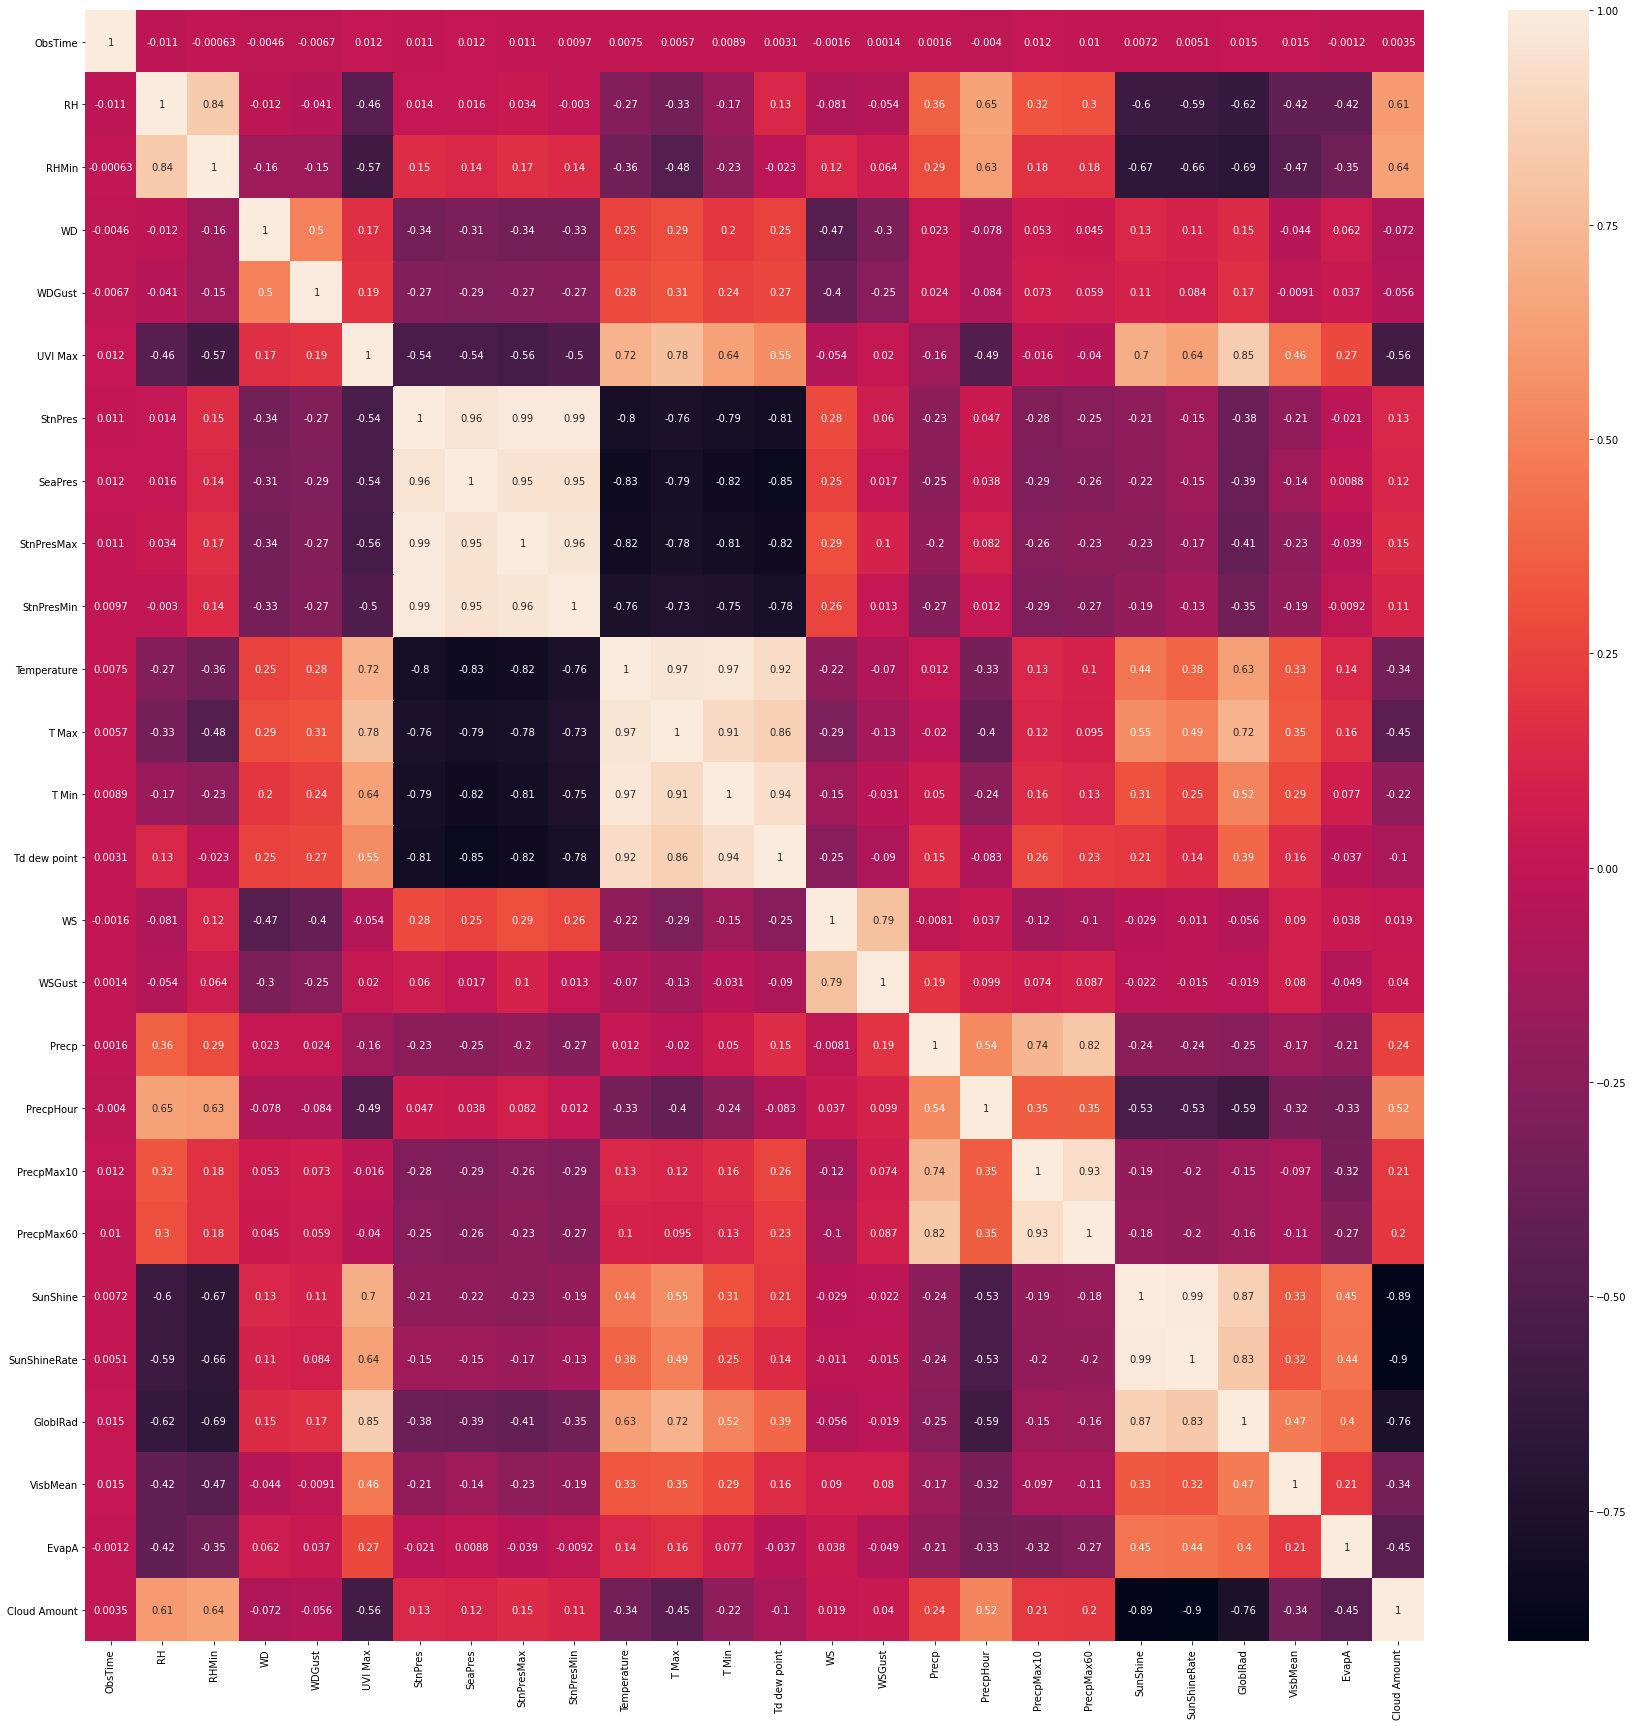

In [ ]:
draw(test)

In [227]:
test.corr()['Precp'].sort_values()
# feats = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,20,21,22,23,24,25]


StnPresMin     -0.274610
GloblRad       -0.250090
SeaPres        -0.245634
SunShineRate   -0.242478
StnPres        -0.241245
SunShine       -0.237047
EvapA          -0.213089
StnPresMax     -0.200910
VisbMean       -0.168480
UVI Max        -0.159733
T Max          -0.020297
WS             -0.008532
ObsTime         0.002944
Temperature     0.010813
WDGust          0.020630
WD              0.028335
T Min           0.048153
Td dew point    0.155035
WSGust          0.193953
Cloud Amount    0.241091
RHMin           0.286943
RH              0.365093
PrecpHour       0.533397
PrecpMax10      0.736711
PrecpMax60      0.816454
Precp           1.000000
Name: Precp, dtype: float64

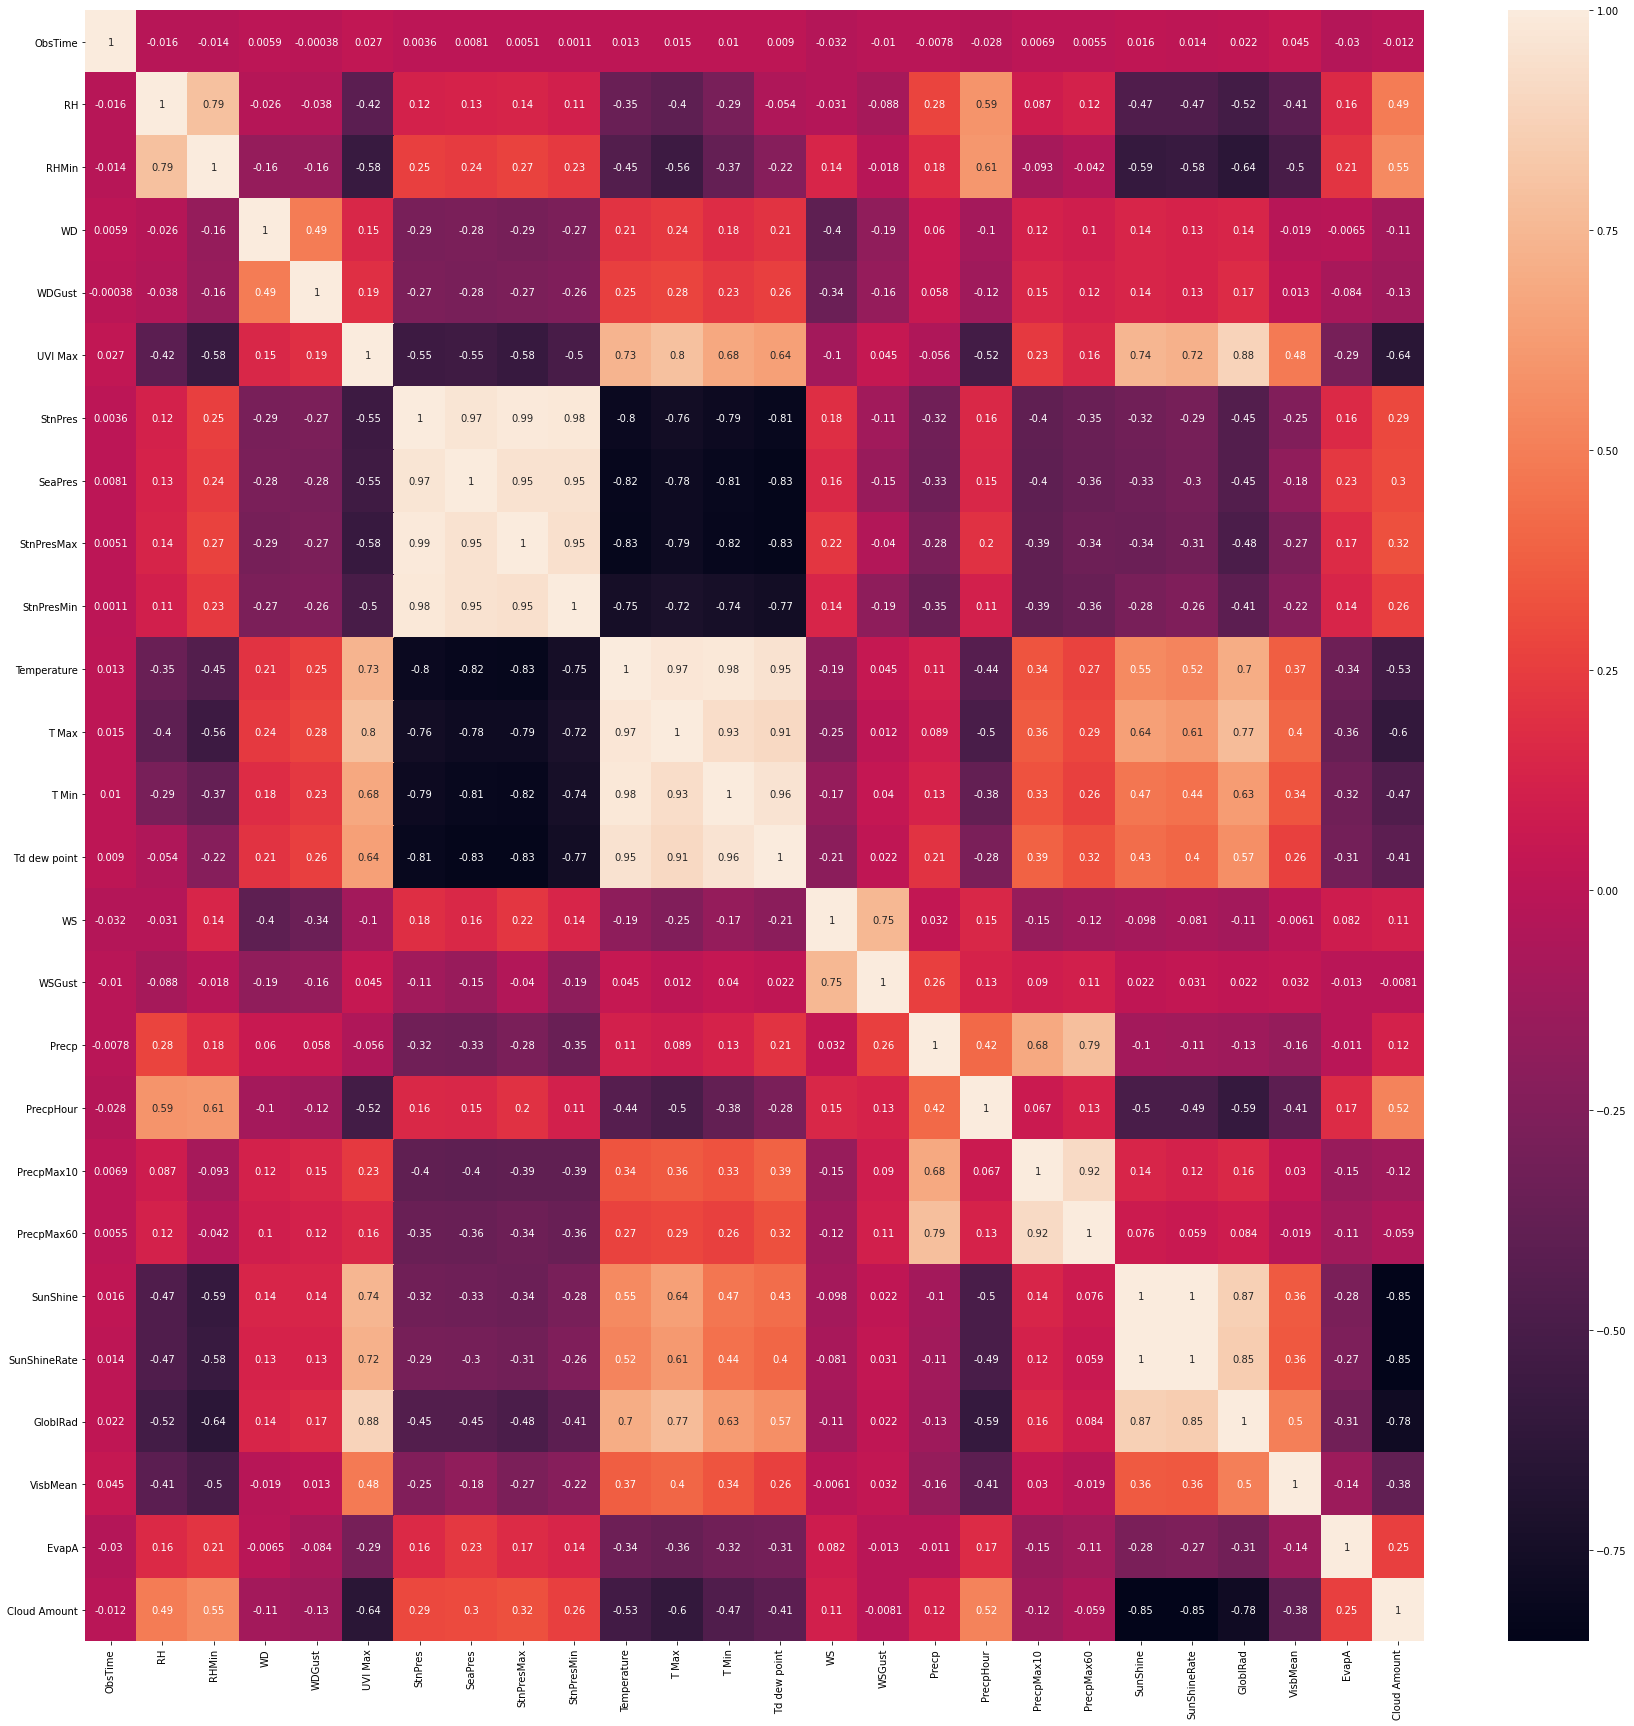

In [ ]:
draw(outOfPrecp)

In [228]:
outOfPrecp.corr()['Precp'].sort_values()

StnPresMin     -0.357921
SeaPres        -0.331411
StnPres        -0.325662
StnPresMax     -0.282823
VisbMean       -0.160571
GloblRad       -0.123271
SunShineRate   -0.108317
SunShine       -0.099474
UVI Max        -0.056916
EvapA          -0.010043
ObsTime        -0.003776
WS              0.031866
WDGust          0.055042
WD              0.062584
T Max           0.092295
Temperature     0.113917
Cloud Amount    0.116143
T Min           0.128909
RHMin           0.176346
Td dew point    0.208755
WSGust          0.262550
RH              0.280658
PrecpHour       0.417009
PrecpMax10      0.685826
PrecpMax60      0.784383
Precp           1.000000
Name: Precp, dtype: float64

In [543]:
outOfPrecp.shape[0]

3926

#### PCA

In [542]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca = pca.fit(test)
X_dr = pca.transform(test)

## Dataset

#### Data Split

In [596]:
#TODO new splitdata
def SplitData(input):
    # input: DataFrame
    # output: ndarray

    input = np.asarray(input)
    # train 15 years
    train_year = 365*11 + 366*4
    train_set = input[:train_year, :]
    # val 3 years
    val_year = 365*2 + 366
    val_set = input[train_year:train_year+val_year, :]
    # test 3 years
    test_set = input[train_year+val_year:, :]

    return train_set, val_set, test_set

def SplitData2(input):
    # input: DataFrame
    # output: ndarray
    train_len = int(outOfPrecp.shape[0] * 0.6)
    val_len = int(outOfPrecp.shape[0] * 0.2)

    input = np.asarray(input)
    # train 15 years
    # train_year = 365*11 + 366*4
    train_set = input[:train_len, :]
    # val 3 years
    val_year = 365*2 + 366
    val_set = input[train_len:train_len+val_len, :]
    # test 3 years
    test_set = input[train_len+val_len:, :]

    return train_set, val_set, test_set

# train_set, val_set, test_set = SplitData(test)
train_set, val_set, test_set = SplitData2(outOfPrecp)


In [597]:
import numpy as np
np.savetxt("/content/drive/MyDrive/統計專題/test_data/train.csv", train_set, delimiter=",")
np.savetxt("/content/drive/MyDrive/統計專題/test_data/val.csv", val_set, delimiter=",")
np.savetxt("/content/drive/MyDrive/統計專題/test_data/test.csv", test_set, delimiter=",")

#### Data Load

In [618]:
class CWBDataset(Dataset):
    def __init__(self, path, mode='train'):
        self.mode = mode

        # Read data into numpy arrays
        with open(path, 'r') as fp:
            data = list(csv.reader(fp))
            data = np.array(data[1:])[:, :].astype("float32")
        
            # feature selection
            #ObsTime,StnPres,SeaPres,StnPresMax,StnPresMin,Temperature,T Max,T Max Time,T Min,Td dew point,RH,RHMin,RHMinTime,WS,WD,WSGust,WDGust,WGustTime,Precp,PrecpHour,PrecpMax10,PrecpMax10Time,PrecpMax60,PrecpMax60Time,SunShine,SunShineRate,GloblRad,VisbMean,EvapA,UVI Max,UVI Max Time,Cloud Amount
            # feats = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,20,21,22,23,24]
            # feats = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,20,21,23]
            # feats = [1,2,3,4,5,6,7,8,9,10,13,14,15,20,21,23]
            #ObsTime	RH	RHMin	WD	WDGust	UVI Max	StnPres	SeaPres	StnPresMax	StnPresMin	Temperature	T Max	T Min	Td dew point	WS	WSGust	Precp	PrecpHour	PrecpMax10	PrecpMax60	SunShine	SunShineRate	GloblRad	VisbMean	EvapA	Cloud Amount
            # feats = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,20,21,22,23,24,25]
            feats = [1,2,5,6,7,8,9,13,20,21,22,23,24,25]

            

            # feats = [i for i in range(25)]
            # feats.pop(16)
            # print(len(data[0]))
            
        if mode in ['train', 'dev', 'test']:
            self.target = data[:, 16]
            self.data = data[:, feats]

        self.dim = self.data.shape[1]


    def __getitem__(self, index):
        if self.mode in ['train', 'dev', 'test']:
            return self.data[index], self.target[index]

    def __len__(self):
        return len(self.data)

#### DataLoader

In [619]:
def torch_dataloader(path, mode, batch_size, n_jobs=0):
    dataset = CWBDataset(path, mode=mode)  # Construct dataset
    dataloader = DataLoader(dataset, batch_size, shuffle=False, 
                            drop_last=False, num_workers=n_jobs, 
                            pin_memory=True) 
    return dataloader

## DNN

#### Network

In [620]:
class NeuralNet(nn.Module):
    ''' A simple fully-connected deep neural network '''
    def __init__(self, input_dim):
        super(NeuralNet, self).__init__()

        # Define your neural network here
        # TODO: How to modify this model to achieve better performance?
        self.net = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.Dropout(0.15),
            nn.BatchNorm1d(128),
            nn.ReLU(),
            # nn.T(),

            # nn.Linear(512, 256),
            # nn.BatchNorm1d(256),
            # nn.ReLU(),

            # nn.Linear(128, 32),
            # nn.BatchNorm1d(32),
            # nn.ReLU(),
            nn.Linear(128, 64),
            nn.Dropout(0.15),
            nn.BatchNorm1d(64),
            nn.ReLU(),
            # nn.sigmoid(),


            # nn.Linear(64, 32),
            # nn.BatchNorm1d(32),
            # nn.ReLU(),



            nn.Linear(64, 1),
        )

        # Mean squared error loss
        self.criterion = nn.MSELoss(reduction='mean')

    def forward(self, x):
        ''' Given input of size (batch_size x input_dim), compute output of the network '''
        return self.net(x).squeeze(1)

    def loss_fn(self, pred, target):
        ''' Calculate loss '''
        # TODO: you may implement L2 regularization here
        return self.criterion(pred, target)

#### Training

In [621]:
def train(tr_set, dv_set, model, config, device):
    n_epochs = config['n_epochs']

    # return the object attribute
    optimizer = getattr(torch.optim, config['optimizer'])(model.parameters(), **config['optim_hparas'])

    min_mse = 1000.
    loss_record = {'train': [], 'dev': []}
    epoch = 0
    while epoch < n_epochs:
        model.train()
        for x, y in tr_set:
            optimizer.zero_grad()
            x, y = x.to(device), y.to(device)
            pred = model(x)
            mse_loss = model.loss_fn(pred, y)
            mse_loss.backward()
            optimizer.step()
            # detach: stop back-propagation
            loss_record['train'].append(mse_loss.detach().cpu().item())
        
        dev_mse = dev(dv_set, model, device)
        if dev_mse < min_mse:
            min_mse = dev_mse
            print("Saving model (epoch = {:4d}, loss = {:.4f})".format(epoch+1, min_mse))
            torch.save(model.state_dict(), config['save_path'])
            # torch.save({
            #             'model_state_dict': model.state_dict(),
            #             'optimizer_state_dict': optimizer.state_dict(),
            #             'loss': min_mse,
            #             }, config['save_path'])
        epoch += 1
        loss_record['dev'].append(dev_mse)
    
    return min_mse, loss_record

#### Validation

In [449]:
def dev(dv_set, model, device):
    model.eval()
    total_loss = 0.
    for x, y in dv_set:
        x, y = x.to(device), y.to(device)
        with torch.no_grad():
            pred = model(x.float())
            mse_loss = model.loss_fn(pred, y)
        total_loss += mse_loss.detach().cpu().item() * len(x)
    total_loss /= len(dv_set.dataset)

    return total_loss

#### Testing

In [450]:
def test(tt_set, model, device):
    model.eval()
    preds = []
    total_loss = 0
    for x, y in tt_set:
        x = x.to(device)
        y = y.to(device)
        x = torch.cuda.FloatTensor(x)
        with torch.no_grad():
            pred = model(x)
            preds.append(pred.detach().cpu())
            mse_loss = model.loss_fn(pred, y)
        total_loss += mse_loss.detach().cpu().item() * len(x)
    total_loss /= len(tt_set.dataset)

    preds = torch.cat(preds, dim=0).numpy()
    return preds, total_loss

In [451]:
def testRain(tt_set, model, device):
    model.eval()
    rainyDay = 0
    rightDay = 0
    preds = []
    total_loss = 0
    for x, y in tt_set:
        x = x.to(device)
        y = y.to(device)
        x = torch.cuda.FloatTensor(x)
        with torch.no_grad():
            pred = model(x)
            preds.append(pred.detach().cpu())
            mse_loss = model.loss_fn(pred, y)
            # print(y)
            # print(y)
            # print(pred)

            for k in range(len(y)):
              # print(k)

              if y[k] > 30:
                rainyDay += 1
                if pred[k] > 30:
                  rightDay += 1
        total_loss += mse_loss.detach().cpu().item() * len(x)
    total_loss /= len(tt_set.dataset)

    acc = rightDay / rainyDay
    print("Rain:" + str(rainyDay))
    print("RainRight:" + str(rightDay))


    preds = torch.cat(preds, dim=0).numpy()
    return preds, total_loss, acc

In [452]:
def testEnsemble(tt_set, models, device, rates):
    allRate = 0
    for re in rates:
      allRate += re  

    for model in models:
      model.eval()



    preds = []
    total_loss = 0
    for x, y in tt_set:
        x = x.to(device)
        y = y.to(device)
        x = torch.cuda.FloatTensor(x)
        with torch.no_grad():
            pred = 0
            r = 0
            
            # pred = models[0](x)
            for model in models:
              pred += model(x) * rates[r]
              r = r + 1

            pred = pred / allRate

            preds.append(pred.detach().cpu())
            mse_loss = model.loss_fn(pred, y)
        total_loss += mse_loss.detach().cpu().item() * len(x)
    total_loss /= len(tt_set.dataset)



    preds = torch.cat(preds, dim=0).numpy()
    return preds, total_loss, acc

In [453]:
def testRainEnsemble(tt_set, models, device, rates):
    allRate = 0
    for re in rates:
      allRate += re  

    for model in models:
      model.eval()
    rainyDay = 0
    rightDay = 0
    preds = []
    total_loss = 0
    for x, y in tt_set:
        x = x.to(device)
        y = y.to(device)
        x = torch.cuda.FloatTensor(x)
        with torch.no_grad():
            pred = 0
            r = 0
            
            # pred = models[0](x)
            for model in models:
              pred += model(x) * rates[r]
              r = r + 1

            pred = pred / allRate
            for k in range(len(y)):
              # print(k)

              if y[k] > 30:
                rainyDay += 1
                if pred[k] > 30:
                  rightDay += 1
            preds.append(pred.detach().cpu())
            mse_loss = model.loss_fn(pred, y)
        total_loss += mse_loss.detach().cpu().item() * len(x)
    total_loss /= len(tt_set.dataset)
    acc = rightDay / rainyDay
    print("Rain:" + str(rainyDay))
    print("RainRight:" + str(rightDay))

    preds = torch.cat(preds, dim=0).numpy()
    return preds, total_loss, acc

In [ ]:
# 寫accuracy方法

#### Hyperparameters

In [633]:
device = get_device()
config = {
            'n_epochs': 10000,
            'batch_size': 1024,
            'optimizer': 'AdamW',
            # 'optimizer': 'RMSprop',

            'optim_hparas': {
                'lr': 1e-4,
            },
            'save_path': '/content/drive/MyDrive/統計專題/model/Yilan/modelYilanRainOnlyFeature3.ckpt'
}

## Main 

#### Load data/model

In [634]:
tr_set = torch_dataloader("/content/drive/MyDrive/統計專題/test_data/train.csv", 'train', config['batch_size'])
dv_set = torch_dataloader("/content/drive/MyDrive/統計專題/test_data/val.csv", 'dev', config['batch_size'])
tt_set = torch_dataloader("/content/drive/MyDrive/統計專題/test_data/test.csv", 'test', config['batch_size'])

In [635]:
model = NeuralNet(tr_set.dataset.dim).to(device)

#### Train

In [636]:
model_loss, model_loss_record = train(tr_set, dv_set, model, config, device)

Saving model (epoch =    1, loss = 711.9666)
Saving model (epoch =    2, loss = 703.6609)
Saving model (epoch =    3, loss = 699.5897)
Saving model (epoch =    4, loss = 697.1514)
Saving model (epoch =    5, loss = 696.7263)
Saving model (epoch =    9, loss = 696.3326)
Saving model (epoch =   10, loss = 695.7433)
Saving model (epoch =   11, loss = 694.8443)
Saving model (epoch =   12, loss = 693.7799)
Saving model (epoch =   13, loss = 692.2674)
Saving model (epoch =   14, loss = 691.1175)
Saving model (epoch =   15, loss = 690.3663)
Saving model (epoch =   16, loss = 689.8074)
Saving model (epoch =   17, loss = 689.5129)
Saving model (epoch =   18, loss = 689.2787)
Saving model (epoch =   19, loss = 689.0615)
Saving model (epoch =   20, loss = 688.3878)
Saving model (epoch =   21, loss = 687.4344)
Saving model (epoch =   22, loss = 686.4792)
Saving model (epoch =   23, loss = 686.0222)
Saving model (epoch =   24, loss = 685.4597)
Saving model (epoch =   25, loss = 684.9602)
Saving mod

KeyboardInterrupt: ignored

In [ ]:
models = []
rates = [1,1,1]


In [638]:
models = []

# del model
model = NeuralNet(tr_set.dataset.dim).to(device)
# ckpt = torch.load("/content/drive/MyDrive/統計專題/model/modelTaipeiRainNew1.ckpt", map_location='cpu')  # Load your best model
# ckpt = torch.load("/content/drive/MyDrive/統計專題/model/modelTaipeiRainNewFeature1.ckpt", map_location='cpu')  # Load your best model
# ckpt = torch.load("/content/drive/MyDrive/統計專題/model/modelTaipeiRainOnly1.ckpt", map_location='cpu')  # Load your best model

# ckpt = torch.load("/content/drive/MyDrive/統計專題/model/modelTaipeiRainOnlyFeature1.ckpt", map_location='cpu')  # Load your best model

# ckpt = torch.load("/content/drive/MyDrive/統計專題/model/Taichung/modelTaichungRain1.ckpt", map_location='cpu')  # Load your best model
# ckpt = torch.load("/content/drive/MyDrive/統計專題/model/Taichung/modelTaichungRainFeature1.ckpt", map_location='cpu')  # Load your best model
# ckpt = torch.load("/content/drive/MyDrive/統計專題/model/Taichung/modelTaichungRainOnly1.ckpt", map_location='cpu')  # Load your best model
# ckpt = torch.load("/content/drive/MyDrive/統計專題/model/Taichung/modelTaichungRainOnlyFeature1.ckpt", map_location='cpu')  # Load your best model


# ckpt = torch.load("/content/drive/MyDrive/統計專題/model/Kaohsiung/modelKaohsiungRain1.ckpt", map_location='cpu')  # Load your best model
# ckpt = torch.load("/content/drive/MyDrive/統計專題/model/Kaohsiung/modelKaohsiungRainFeature1.ckpt", map_location='cpu')  # Load your best model
# ckpt = torch.load("/content/drive/MyDrive/統計專題/model/Kaohsiung/modelKaohsiungRainOnly1.ckpt", map_location='cpu')  # Load your best model
# ckpt = torch.load("/content/drive/MyDrive/統計專題/model/Kaohsiung/modelKaohsiungRainOnlyFeature1.ckpt", map_location='cpu')  # Load your best model


# ckpt = torch.load("/content/drive/MyDrive/統計專題/model/Yilan/modelYilanRain1.ckpt", map_location='cpu')  # Load your best model
# ckpt = torch.load("/content/drive/MyDrive/統計專題/model/Yilan/modelYilanRainFeature1.ckpt", map_location='cpu')  # Load your best model
# ckpt = torch.load("/content/drive/MyDrive/統計專題/model/Yilan/modelYilanRainOnly1.ckpt", map_location='cpu')  # Load your best model
ckpt = torch.load("/content/drive/MyDrive/統計專題/model/Yilan/modelYilanRainOnlyFeature1.ckpt", map_location='cpu')  # Load your best model


model.load_state_dict(ckpt)

models.append(model)

predits, FinalLoss,acc = testRain(tt_set, model, device)
print(FinalLoss)
print(acc)

Rain:113
RainRight:56
482.19573974609375
0.49557522123893805


In [639]:
model2 = NeuralNet(tr_set.dataset.dim).to(device)
# ckpt = torch.load("/content/drive/MyDrive/統計專題/model/modelTaipeiRainNew2.ckpt", map_location='cpu')  # Load your best model
# ckpt = torch.load("/content/drive/MyDrive/統計專題/model/modelTaipeiRainNewFeature2.ckpt", map_location='cpu')  # Load your best model
# ckpt = torch.load("/content/drive/MyDrive/統計專題/model/modelTaipeiRainOnly2.ckpt", map_location='cpu')  # Load your best model
# ckpt = torch.load("/content/drive/MyDrive/統計專題/model/modelTaipeiRainOnlyFeature2.ckpt", map_location='cpu')  # Load your best model

# ckpt = torch.load("/content/drive/MyDrive/統計專題/model/Taichung/modelTaichungRain2.ckpt", map_location='cpu')  # Load your best model
# ckpt = torch.load("/content/drive/MyDrive/統計專題/model/Taichung/modelTaichungRainFeature2.ckpt", map_location='cpu')  # Load your best model
# ckpt = torch.load("/content/drive/MyDrive/統計專題/model/Taichung/modelTaichungRainOnly2.ckpt", map_location='cpu')  # Load your best model

# ckpt = torch.load("/content/drive/MyDrive/統計專題/model/Taichung/modelTaichungRainOnlyFeature2.ckpt", map_location='cpu')  # Load your best model

# ckpt = torch.load("/content/drive/MyDrive/統計專題/model/Kaohsiung/modelKaohsiungRain2.ckpt", map_location='cpu')  # Load your best model
# ckpt = torch.load("/content/drive/MyDrive/統計專題/model/Kaohsiung/modelKaohsiungRainFeature2.ckpt", map_location='cpu')  # Load your best model
# ckpt = torch.load("/content/drive/MyDrive/統計專題/model/Kaohsiung/modelKaohsiungRainOnly2.ckpt", map_location='cpu')  # Load your best model
# ckpt = torch.load("/content/drive/MyDrive/統計專題/model/Kaohsiung/modelKaohsiungRainOnlyFeature2.ckpt", map_location='cpu')  # Load your best model

# ckpt = torch.load("/content/drive/MyDrive/統計專題/model/Yilan/modelYilanRain2.ckpt", map_location='cpu')  # Load your best model
# ckpt = torch.load("/content/drive/MyDrive/統計專題/model/Yilan/modelYilanRainFeature2.ckpt", map_location='cpu')  # Load your best model
# ckpt = torch.load("/content/drive/MyDrive/統計專題/model/Yilan/modelYilanRainOnly2.ckpt", map_location='cpu')  # Load your best model
ckpt = torch.load("/content/drive/MyDrive/統計專題/model/Yilan/modelYilanRainOnlyFeature2.ckpt", map_location='cpu')  # Load your best model

model2.load_state_dict(ckpt)

models.append(model2)

predits, FinalLoss, acc = testRain(tt_set, model2, device)
print(FinalLoss)
print(acc)

Rain:113
RainRight:61
478.7880554199219
0.5398230088495575


In [640]:
model3 = NeuralNet(tr_set.dataset.dim).to(device)
# ckpt = torch.load("/content/drive/MyDrive/統計專題/model/modelTaipeiRainNew3.ckpt", map_location='cpu')  # Load your best model
# ckpt = torch.load("/content/drive/MyDrive/統計專題/model/modelTaipeiRainNewFeature3.ckpt", map_location='cpu')  # Load your best model
# ckpt = torch.load("/content/drive/MyDrive/統計專題/model/modelTaipeiRainOnly3.ckpt", map_location='cpu')  # Load your best model
# ckpt = torch.load("/content/drive/MyDrive/統計專題/model/modelTaipeiRainOnlyFeature3.ckpt", map_location='cpu')  # Load your best model

# ckpt = torch.load("/content/drive/MyDrive/統計專題/model/Taichung/modelTaichungRain3.ckpt", map_location='cpu')  # Load your best model
# ckpt = torch.load("/content/drive/MyDrive/統計專題/model/Taichung/modelTaichungRainFeature3.ckpt", map_location='cpu')  # Load your best model
# ckpt = torch.load("/content/drive/MyDrive/統計專題/model/Taichung/modelTaichungRainOnly3.ckpt", map_location='cpu')  # Load your best model
# ckpt = torch.load("/content/drive/MyDrive/統計專題/model/Taichung/modelTaichungRainOnlyFeature3.ckpt", map_location='cpu')  # Load your best model

# ckpt = torch.load("/content/drive/MyDrive/統計專題/model/Kaohsiung/modelKaohsiungRain3.ckpt", map_location='cpu')  # Load your best model

# ckpt = torch.load("/content/drive/MyDrive/統計專題/model/Kaohsiung/modelKaohsiungRainFeature3.ckpt", map_location='cpu')  # Load your best model
# ckpt = torch.load("/content/drive/MyDrive/統計專題/model/Kaohsiung/modelKaohsiungRainOnly3.ckpt", map_location='cpu')  # Load your best model
# ckpt = torch.load("/content/drive/MyDrive/統計專題/model/Kaohsiung/modelKaohsiungRainOnlyFeature3.ckpt", map_location='cpu')  # Load your best model

# ckpt = torch.load("/content/drive/MyDrive/統計專題/model/Yilan/modelYilanRain3.ckpt", map_location='cpu')  # Load your best model
# ckpt = torch.load("/content/drive/MyDrive/統計專題/model/Yilan/modelYilanRainFeature3.ckpt", map_location='cpu')  # Load your best model
# ckpt = torch.load("/content/drive/MyDrive/統計專題/model/Yilan/modelYilanRainOnly3.ckpt", map_location='cpu')  # Load your best model
ckpt = torch.load("/content/drive/MyDrive/統計專題/model/Yilan/modelYilanRainOnlyFeature3.ckpt", map_location='cpu')  # Load your best model

model3.load_state_dict(ckpt)

models.append(model3)

predits, FinalLoss, acc = testRain(tt_set, model3, device)
print(FinalLoss)
print(acc)

Rain:113
RainRight:65
472.2750549316406
0.5752212389380531


In [641]:
predits, FinalLoss, acc = testRainEnsemble(tt_set, models, device, rates)
print(FinalLoss)
print(acc)

Rain:113
RainRight:60
475.7124938964844
0.5309734513274337


In [ ]:
modelRain = NeuralNet(tr_set.dataset.dim).to(device)
ckpt = torch.load("/content/drive/MyDrive/統計專題/model/modelTaipeiRainNew1.ckpt", map_location='cpu')  # Load your best model
modelRain.load_state_dict(ckpt)

models.append(model)
# acc = 0
predits, FinalLoss, acc = testRain(tt_set, modelRain, device)
print(FinalLoss)
print(acc)


tensor([0.0000e+00, 0.0000e+00, 3.0000e-01, 1.0000e+00, 2.6000e+01, 6.8900e+01,
        7.6100e+01, 2.2500e+01, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.2500e+01,
        2.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 1.1500e+01, 8.8000e+00, 7.7000e+00, 1.7500e+01,
        2.8000e+00, 5.9000e+00, 2.6500e+01, 2.8000e+01, 1.7000e+01, 0.0000e+00,
        1.4500e+01, 9.5000e+00, 3.9000e+00, 5.9000e+00, 4.5000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 2.0000e-01, 1.9100e+01, 0.0000e+00, 0.0000e+00,
        6.4000e+00, 1.0000e-01, 0.0000e+00, 1.9300e+01, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 1.0000e-01, 1.3000e+00, 0.0000e+00, 1.5000e+00, 2.5300e+01,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 4.0000e-01,
        1.4000e+00, 5.0000e-01, 0.0000e+

## Reference

In [ ]:
# Heng-Jui Chang @ NTUEE (https://github.com/ga642381/ML2021-Spring/blob/main/HW01/HW01.ipynb) [Reuse and modify the training code]
# LSTM: https://github.com/piEsposito/pytorch-lstm-by-hand